In [ ]:
#importing all the necessary libraries
import pandas as pd
import numpy as np
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# The dataset was sourced from the official website of the Government of Australia.[1]
# Importing the dataset to create a pandas dataframe

crash_report = pd.read_csv('Pedestrian_Crashes.csv')
crash_report

,Location,Latitude,Longitude,Country,County,Reported Location,Crash ID,Crash Date,Year,Month,Crash Time,Quarter of the day,Crash Type,Severity,Pedestrians,Pedestrian Casualties
0,"-35.23191, 149.054575",-35.231910,149.054575,"Ratcliffe Crescent after Challinor Crescent, A...",Florey 2615,RATCLIFFE CRESCENT (CHALLINOR -> CHALLINOR),1152106,23/01/2017,2017,January,16:00,Afternoon,Struck pedestrian (On Road),Injury,1,1
1,"-35.320601, 149.134962",-35.320601,149.134962,"Manuka Shops, Australian Capital Territory, Ma...",Griffith 2603,CAPTAIN COOK/FRANKLIN INTERSECTION,1162345,23/05/2017,2017,May,18:45,Evening,Struck pedestrian (On Road),Injury,1,1
2,"-35.342443, 149.12875",-35.342443,149.128750,"Australian Capital Territory, Borrowdale Stree...",Red Hill 2603,BORROWDALE STREET (NORFOLK -> BORROWDALE),1152674,05/09/2016,2016,September,10:29,Morning,Struck pedestrian (Off Road),Injury,1,1
3,"-35.275373, 149.125049",-35.275373,149.125049,"Food Co-op, Australian Capital Territory, King...",City 2601,BARRY/KINGSLEY INTERSECTION,1154539,03/03/2017,2017,March,16:23,Afternoon,Struck pedestrian (On Road),Injury,1,1
4,"-35.24957, 149.070075",-35.249570,149.070075,"Belconnen Tennis Club, Australian Capital Terr...",Macquarie 2614,HALLORAN CLOSE (BOWMAN -> HALLORAN),1155513,15/02/2017,2017,February,22:55,Evening,Struck pedestrian (On Road),Property Damage Only,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
558,"-35.279727, 149.125324",-35.279727,149.125324,"Australian Capital Territory, Marcus Clarke St...",City 2601,MARCUS CLARKE/UNIVERSITY INTERSECTION,1236673,16/11/2020,2020,November,09:15,Morning,Struck pedestrian (Off Road),Injury,1,1
559,"-35.442848, 149.129881",-35.442848,149.129881,"Australian Capital Territory, Monaro Highway, ...",Theodore 2905,MONARO HIGHWAY (JOHNSON -> OLD COOMA),1250708,06/07/2021,2021,July,07:00,Morning,Struck pedestrian (On Road),Injury,1,1
560,"-35.200757, 149.161191",-35.200757,149.161191,"Australian Capital Territory, Phantom Street, ...",Harrison 2914,NULLARBOR/PHANTOM INTERSECTION,1244842,15/04/2021,2021,April,19:25,Evening,Struck pedestrian (On Road),Property Damage Only,1,0
561,"-35.27971, 149.12534",-35.279710,149.125340,"Australian Capital Territory, Marcus Clarke St...",City 2601,MARCUS CLARKE/UNIVERSITY INTERSECTION,1248633,07/06/2021,2021,June,18:42,Evening,Struck pedestrian (On Road),Property Damage Only,1,0


# Data Preprocessing Notes


1. The sourced data had geolocation data. The exact county where incidents happened is sourced using OpenCage API.
2. The 'Quarter of the Day' column is generated by using "Crash Time" parameter and the columns 'Month' and 'Year' are gathered by using "Crash Date" parameter.
3. Everything mentioned above is done using Google Sheets script and excel functions.[2]







#Data Cleaning and Improving the codability

In [ ]:
# Changed data type of Crash ID and Crash Date to string and datetime respectively

crash_report['Crash Date'] = pd.to_datetime(crash_report['Crash Date'], dayfirst=True)

# This is created based on Pandas user guide on categorical data and stackoverflow.[3][4]
# The reason for this is due to year is consistently representing as a numerical value, which is not being converted to datetime format accurately.

year_order = [2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021]
crash_report['Year'] = pd.Categorical(crash_report['Year'], categories=year_order, ordered=True)

#This is done to maintain the accurate chronological sequence of the months

month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July',
               'August', 'September', 'October', 'November', 'December']
crash_report['Month'] = pd.Categorical(crash_report['Month'], categories=month_order, ordered=True)

In [ ]:
crash_report

,Location,Latitude,Longitude,Country,County,Reported Location,Crash ID,Crash Date,Year,Month,Crash Time,Quarter of the day,Crash Type,Severity,Pedestrians,Pedestrian Casualties
0,"-35.23191, 149.054575",-35.231910,149.054575,"Ratcliffe Crescent after Challinor Crescent, A...",Florey 2615,RATCLIFFE CRESCENT (CHALLINOR -> CHALLINOR),1152106,2017-01-23,2017,January,16:00,Afternoon,Struck pedestrian (On Road),Injury,1,1
1,"-35.320601, 149.134962",-35.320601,149.134962,"Manuka Shops, Australian Capital Territory, Ma...",Griffith 2603,CAPTAIN COOK/FRANKLIN INTERSECTION,1162345,2017-05-23,2017,May,18:45,Evening,Struck pedestrian (On Road),Injury,1,1
2,"-35.342443, 149.12875",-35.342443,149.128750,"Australian Capital Territory, Borrowdale Stree...",Red Hill 2603,BORROWDALE STREET (NORFOLK -> BORROWDALE),1152674,2016-09-05,2016,September,10:29,Morning,Struck pedestrian (Off Road),Injury,1,1
3,"-35.275373, 149.125049",-35.275373,149.125049,"Food Co-op, Australian Capital Territory, King...",City 2601,BARRY/KINGSLEY INTERSECTION,1154539,2017-03-03,2017,March,16:23,Afternoon,Struck pedestrian (On Road),Injury,1,1
4,"-35.24957, 149.070075",-35.249570,149.070075,"Belconnen Tennis Club, Australian Capital Terr...",Macquarie 2614,HALLORAN CLOSE (BOWMAN -> HALLORAN),1155513,2017-02-15,2017,February,22:55,Evening,Struck pedestrian (On Road),Property Damage Only,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
558,"-35.279727, 149.125324",-35.279727,149.125324,"Australian Capital Territory, Marcus Clarke St...",City 2601,MARCUS CLARKE/UNIVERSITY INTERSECTION,1236673,2020-11-16,2020,November,09:15,Morning,Struck pedestrian (Off Road),Injury,1,1
559,"-35.442848, 149.129881",-35.442848,149.129881,"Australian Capital Territory, Monaro Highway, ...",Theodore 2905,MONARO HIGHWAY (JOHNSON -> OLD COOMA),1250708,2021-07-06,2021,July,07:00,Morning,Struck pedestrian (On Road),Injury,1,1
560,"-35.200757, 149.161191",-35.200757,149.161191,"Australian Capital Territory, Phantom Street, ...",Harrison 2914,NULLARBOR/PHANTOM INTERSECTION,1244842,2021-04-15,2021,April,19:25,Evening,Struck pedestrian (On Road),Property Damage Only,1,0
561,"-35.27971, 149.12534",-35.279710,149.125340,"Australian Capital Territory, Marcus Clarke St...",City 2601,MARCUS CLARKE/UNIVERSITY INTERSECTION,1248633,2021-06-07,2021,June,18:42,Evening,Struck pedestrian (On Road),Property Damage Only,1,0


In [ ]:
# Dropped the columns that are not useful to perform analysis
crash_report = crash_report.drop(columns={'Location', 'Country', 'Crash ID'})

In [ ]:
# Rearranged the order of columns
crash_report = crash_report[['Latitude', 'Longitude', 'County', 'Crash Date','Year', 'Month', 'Crash Time',
                             'Quarter of the day', 'Crash Type', 'Severity', 'Pedestrians', 'Pedestrian Casualties']]

In [ ]:
# Renaming the columns in snake case to avoid errors during analysis

crash_report = crash_report.rename(columns={'Latitude': 'latitude',
                                            'Longitude': 'longitude',
                                            'County': 'county',
                                            'Crash Date': 'crash_date',
                                            'Year': 'year',
                                            'Month': 'month',
                                            'Crash Time': 'crash_time',
                                            'Quarter of the day': 'time_of_the_day',
                                            'Crash Type': 'crash_type',
                                            'Severity': 'severity',
                                            'Pedestrians': 'peds_involved',
                                            'Pedestrian Casualties': 'peds_casualties'})

In [ ]:
crash_report

,latitude,longitude,county,crash_date,year,month,crash_time,time_of_the_day,crash_type,severity,peds_involved,peds_casualties
0,-35.231910,149.054575,Florey 2615,2017-01-23,2017,January,16:00,Afternoon,Struck pedestrian (On Road),Injury,1,1
1,-35.320601,149.134962,Griffith 2603,2017-05-23,2017,May,18:45,Evening,Struck pedestrian (On Road),Injury,1,1
2,-35.342443,149.128750,Red Hill 2603,2016-09-05,2016,September,10:29,Morning,Struck pedestrian (Off Road),Injury,1,1
3,-35.275373,149.125049,City 2601,2017-03-03,2017,March,16:23,Afternoon,Struck pedestrian (On Road),Injury,1,1
4,-35.249570,149.070075,Macquarie 2614,2017-02-15,2017,February,22:55,Evening,Struck pedestrian (On Road),Property Damage Only,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
558,-35.279727,149.125324,City 2601,2020-11-16,2020,November,09:15,Morning,Struck pedestrian (Off Road),Injury,1,1
559,-35.442848,149.129881,Theodore 2905,2021-07-06,2021,July,07:00,Morning,Struck pedestrian (On Road),Injury,1,1
560,-35.200757,149.161191,Harrison 2914,2021-04-15,2021,April,19:25,Evening,Struck pedestrian (On Road),Property Damage Only,1,0
561,-35.279710,149.125340,City 2601,2021-06-07,2021,June,18:42,Evening,Struck pedestrian (On Road),Property Damage Only,1,0


# Descriptive Analysis


**Information about dataset**

In [ ]:
crash_report.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 563 entries, 0 to 562
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   latitude         563 non-null    float64       
 1   longitude        563 non-null    float64       
 2   county           563 non-null    object        
 3   crash_date       563 non-null    datetime64[ns]
 4   year             563 non-null    category      
 5   month            563 non-null    category      
 6   crash_time       563 non-null    object        
 7   time_of_the_day  563 non-null    object        
 8   crash_type       563 non-null    object        
 9   severity         563 non-null    object        
 10  peds_involved    563 non-null    int64         
 11  peds_casualties  563 non-null    int64         
dtypes: category(2), datetime64[ns](1), float64(2), int64(2), object(5)
memory usage: 46.0+ KB


###Describing the various factors of the dataset###

In [ ]:
crash_report.describe()

,latitude,longitude,peds_involved,peds_casualties
count,563.000000,563.000000,563.000000,563.000000
mean,-35.293758,149.110150,1.028419,0.671403
std,0.068089,0.035895,0.176690,0.506558
min,-35.475051,149.015606,1.000000,0.000000
25%,-35.338659,149.085642,1.000000,0.000000
50%,-35.279004,149.124979,1.000000,1.000000
75%,-35.248265,149.132845,1.000000,1.000000
max,-35.156277,149.326601,3.000000,3.000000


**The Correlation between people involved and people deceased**

In [ ]:
crash_report.corr()

<ipython-input-11-e48894b9f8b9>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  crash_report.corr()


,latitude,longitude,peds_involved,peds_casualties
latitude,1.000000,0.115537,0.009643,0.045905
longitude,0.115537,1.000000,-0.007984,-0.008886
peds_involved,0.009643,-0.007984,1.000000,0.203923
peds_casualties,0.045905,-0.008886,0.203923,1.000000


**The Counties with the highest number of recorded accidents**


In [ ]:
crash_report['county'].value_counts().head(10)

 City 2601         99
 Phillip 2606      24
 Belconnen 2617    23
 Turner 2612       20
 Greenway 2900     14
 Dickson 2602      14
 Kambah 2902       14
 Gungahlin 2912    13
 Braddon 2612      13
 Bruce 2617        11
Name: county, dtype: int64

**The Distribution of the accidents based on the year**

In [ ]:
crash_report['year'].value_counts()

2012    65
2016    65
2019    65
2014    64
2015    63
2018    59
2017    56
2013    49
2020    48
2021    29
Name: year, dtype: int64

**The Distribution of accidents based on the months**

In [ ]:
crash_report['month'].value_counts()

November     63
May          61
March        51
April        50
February     49
September    49
October      48
June         43
August       41
January      40
December     35
July         33
Name: month, dtype: int64

**Most documented accidents in a month of a subsequent year**

In [ ]:
crash_report[['year', 'month']].value_counts().head(10)

year  month    
2012  November     12
2019  June         12
2014  September    11
2021  May           9
2016  September     9
2013  November      8
2015  May           8
2018  October       8
2020  November      8
2017  November      8
dtype: int64

**The Distribution of accidents based on the time of the days**

In [ ]:
crash_report['time_of_the_day'].value_counts()

Afternoon    248
Morning      168
Evening      121
Night         26
Name: time_of_the_day, dtype: int64

**The Distribution of accidents based on the types of crash**

In [ ]:
crash_report['crash_type'].value_counts()

Struck pedestrian (On Road)         472
Struck pedestrian (Off Road)         79
Other - Vehicle to Vehicle            4
Collision with parked vehicle         3
Right turn into oncoming vehicle      2
Right angle collision                 2
Opposite direction side swipe         1
Name: crash_type, dtype: int64

**The Distribution of accidents based on the severity of crash**

In [ ]:
crash_report['severity'].value_counts()

Injury                  363
Property Damage Only    189
Fatal                    11
Name: severity, dtype: int64

**Stats about the people involved and people died in the crash**

In [ ]:
people_involved = 'Total Number of People involved in car crashes', crash_report['peds_involved'].sum()
people_involved

('Total Number of People involved in car crashes', 579)

In [ ]:
people_died = 'Total Number of People died in car crashes', crash_report['peds_casualties'].sum()
people_died

('Total Number of People died in car crashes', 378)

## Analysis of different parameters

In [ ]:
crash_report.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 563 entries, 0 to 562
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   latitude         563 non-null    float64       
 1   longitude        563 non-null    float64       
 2   county           563 non-null    object        
 3   crash_date       563 non-null    datetime64[ns]
 4   year             563 non-null    category      
 5   month            563 non-null    category      
 6   crash_time       563 non-null    object        
 7   time_of_the_day  563 non-null    object        
 8   crash_type       563 non-null    object        
 9   severity         563 non-null    object        
 10  peds_involved    563 non-null    int64         
 11  peds_casualties  563 non-null    int64         
dtypes: category(2), datetime64[ns](1), float64(2), int64(2), object(5)
memory usage: 46.0+ KB


**People lost their lives in car accidents in each year**

In [ ]:

crash_report.groupby('year')['peds_casualties'].value_counts()

year  peds_casualties
2012  1                  46
      0                  18
      2                   1
2013  1                  28
      0                  19
      2                   2
2014  1                  36
      0                  27
      2                   1
2015  1                  39
      0                  23
      2                   1
2016  1                  41
      0                  24
2017  1                  40
      0                  15
      2                   1
2018  1                  39
      0                  19
      2                   1
2019  1                  40
      0                  25
2020  1                  36
      0                  12
2021  1                  16
      0                  12
      3                   1
Name: peds_casualties, dtype: int64

**People lost their lives in car accidents in each month**

In [ ]:
crash_report.groupby('month')['peds_casualties'].value_counts()

month      peds_casualties
January    1                  27
           0                  11
           2                   2
February   1                  33
           0                  15
           2                   1
March      1                  26
           0                  23
           2                   1
           3                   1
April      1                  29
           0                  20
           2                   1
May        1                  40
           0                  19
           2                   2
June       1                  26
           0                  17
July       1                  24
           0                   9
August     1                  26
           0                  15
September  1                  37
           0                  12
October    1                  31
           0                  17
November   1                  38
           0                  25
December   1                  24
           0    

**People lost their lives in car accidents at different time of the day**

In [ ]:
crash_report.groupby('time_of_the_day')['peds_casualties'].value_counts()

time_of_the_day  peds_casualties
Afternoon        1                  162
                 0                   82
                 2                    4
Evening          1                   81
                 0                   40
Morning          1                  102
                 0                   64
                 2                    1
                 3                    1
Night            1                   16
                 0                    8
                 2                    2
Name: peds_casualties, dtype: int64

**People lost their lives in different types of car crashes**

In [ ]:
crash_report.groupby('crash_type')['peds_casualties'].value_counts()

crash_type                        peds_casualties
Collision with parked vehicle     1                    3
Opposite direction side swipe     1                    1
Other - Vehicle to Vehicle        1                    2
                                  2                    1
                                  3                    1
Right angle collision             1                    2
Right turn into oncoming vehicle  0                    1
                                  1                    1
Struck pedestrian (Off Road)      1                   54
                                  0                   25
Struck pedestrian (On Road)       1                  298
                                  0                  168
                                  2                    6
Name: peds_casualties, dtype: int64

**Severity of car crashes that resulted in deaths**

In [ ]:
crash_report.groupby('severity')['peds_casualties'].value_counts()

severity              peds_casualties
Fatal                 1                   10
                      2                    1
Injury                1                  351
                      2                    6
                      0                    5
                      3                    1
Property Damage Only  0                  189
Name: peds_casualties, dtype: int64

**Top 10 Counties where the most reported accidents results in casualties**

In [ ]:
crash_report.groupby('county')['peds_casualties'].sum().reset_index().sort_values(by='peds_casualties', ascending=False).head(10)

,county,peds_casualties
22,City 2601,55
7,Belconnen 2617,16
99,Turner 2612,15
86,Phillip 2606,13
9,Braddon 2612,11
65,Kambah 2902,10
10,Bruce 2617,10
49,Griffith 2603,9
68,Lyneham 2602,9
51,Gungahlin 2912,8


# Visualizations

**Representation of reported accidents respective to each year and month**

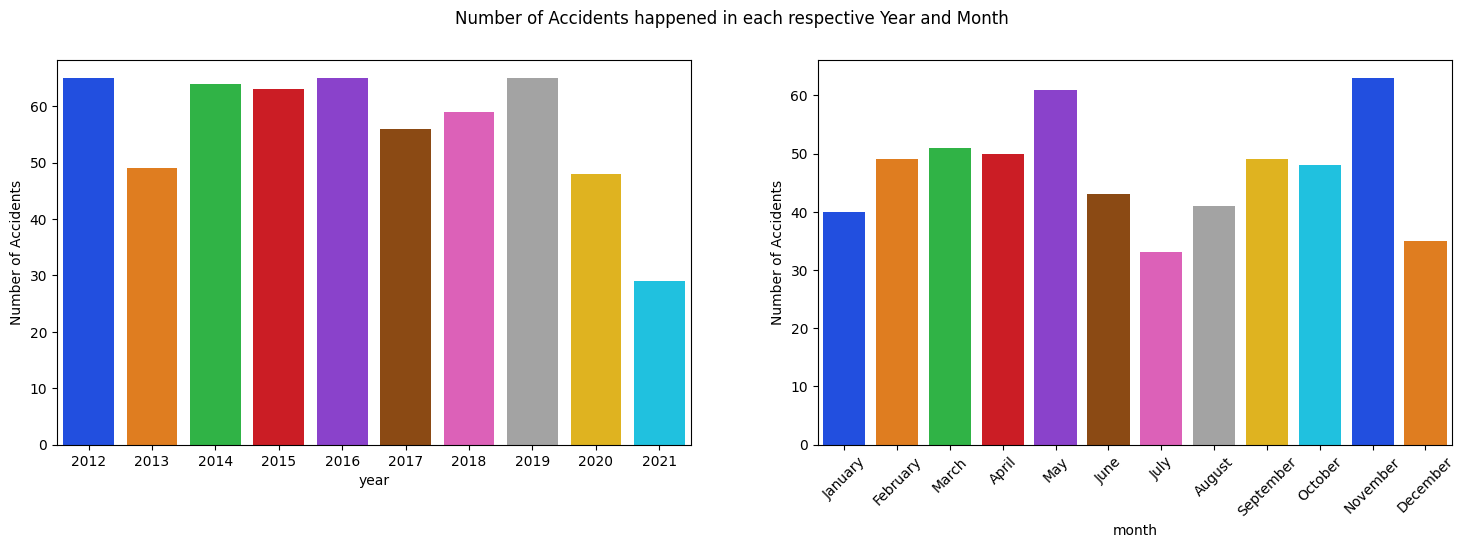

In [ ]:
fig, ax= plt.subplots(1,2,figsize=(18, 5))
plt.xticks(rotation=45)
for i, col in enumerate(['year', 'month']):
  sns.countplot(data=crash_report, x=col, ax=ax[i], palette='bright')
ax[0].set_ylabel('Number of Accidents')
ax[1].set_ylabel('Number of Accidents')
fig.suptitle('Number of Accidents happened in each respective Year and Month')
fig.savefig('countplot.png')

**Determining when accidents occur the most frequently**

In [ ]:
fig = px.pie(crash_report.groupby('time_of_the_day').size().reset_index(),
             values=0, names=['Afternoon','Morning', 'Evening', 'Night'], title='Recorded Car Accidents during times of the day', template='simple_white')
fig.show()

**The average fatality rate in various reported car crashes**

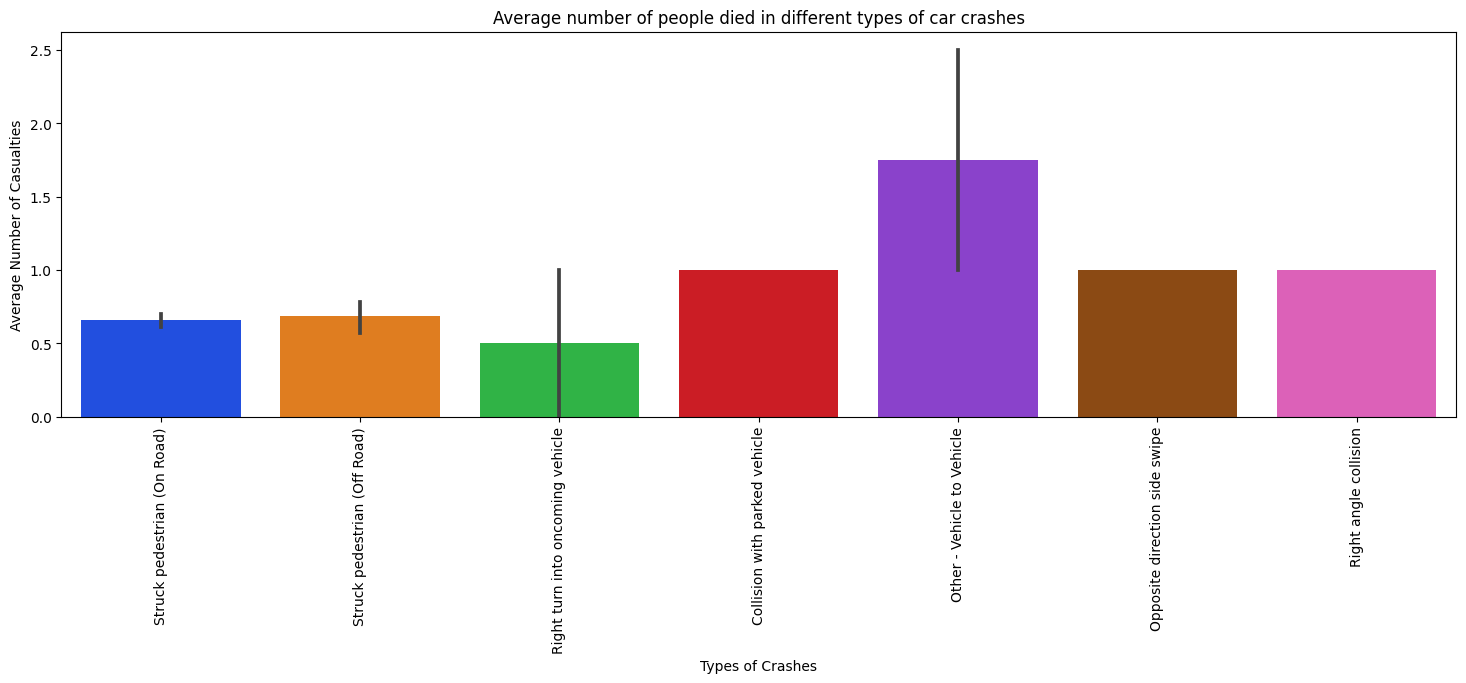

In [ ]:
# The reference for xticks was from matplotlib library documentation[5]

plt.figure(figsize=(18, 5))
plt.xticks(rotation=90)
sns.barplot(data=crash_report, x='crash_type', y='peds_casualties', palette='bright')
plt.xlabel('Types of Crashes')
plt.ylabel('Average Number of Casualties')
plt.title('Average number of people died in different types of car crashes')
plt.savefig('barplot.png')

**List of the counties wherein the majority of accidents resulted in fatalities**

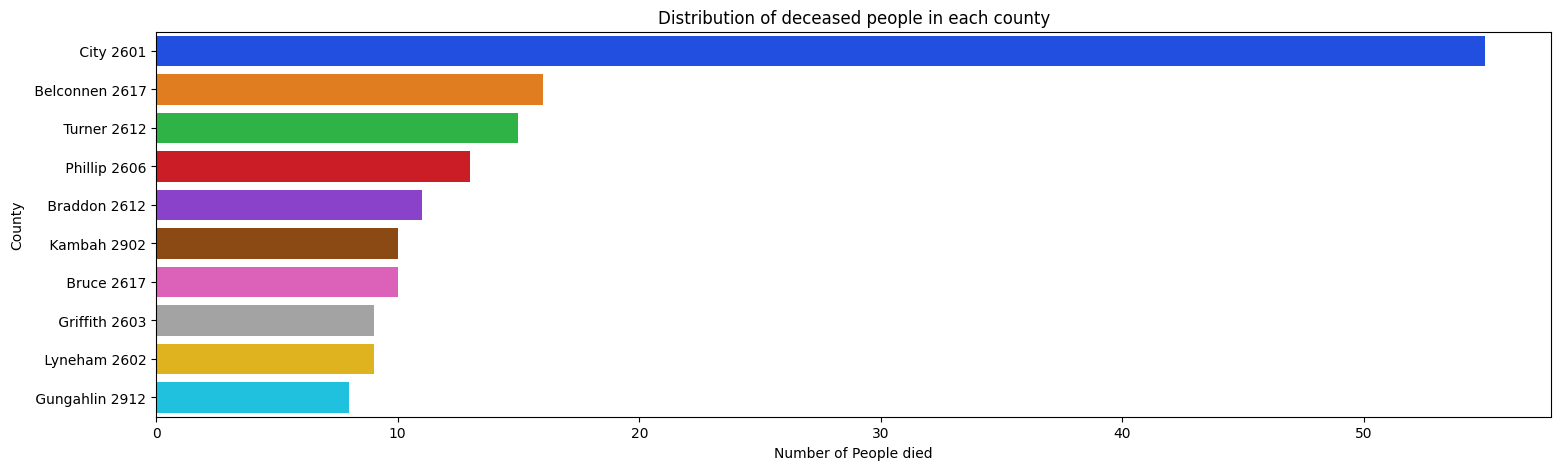

In [ ]:
plt.figure(figsize=(18, 5))
sns.barplot(data=crash_report.groupby('county')['peds_casualties'].sum().reset_index().sort_values(by='peds_casualties', ascending=False).head(10),
            y='county', x='peds_casualties', palette= 'bright')
plt.xlabel('Number of People died')
plt.ylabel('County')
plt.title('Distribution of deceased people in each county')
plt.savefig('Barplot2.png')


**The categorization of car accidents based on the types of crash**

In [ ]:
fig = px.pie(crash_report, names='crash_type', hole=0.4, title='Car accidents categorized by crash types', template='simple_white')
fig.show()
fig.write_html('Pie Chart2.html')

**Number of Deceased people in each reported accident differentiated by Month**

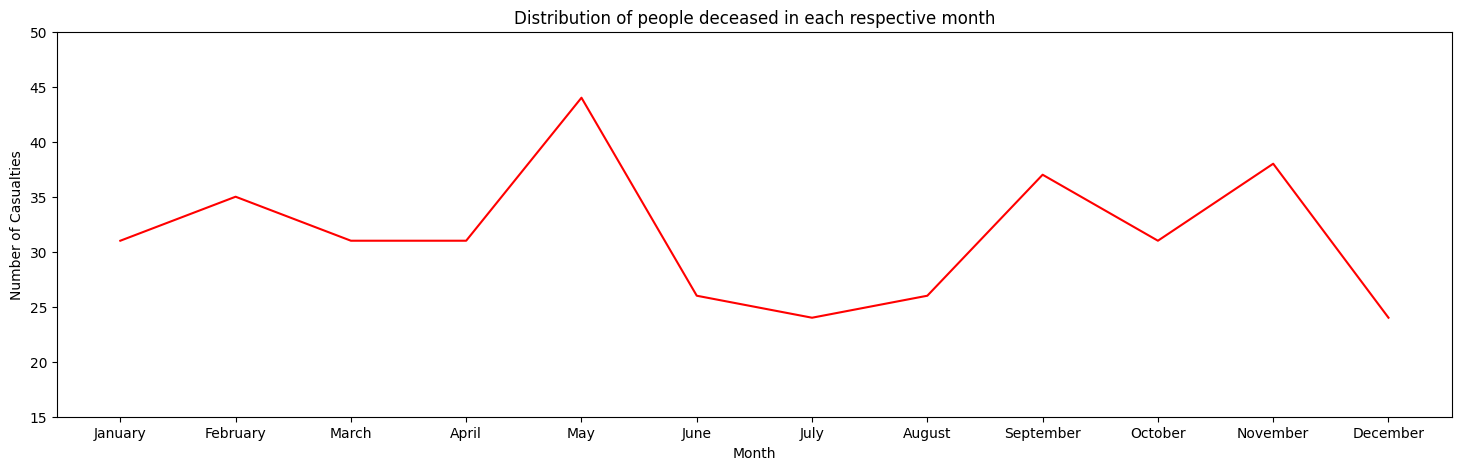

In [ ]:
#plt.ylim is referenced from stackoverflow[6]

plt.figure(figsize=(18, 5))
plt.ylim(15, 50)
sns.lineplot(data=crash_report.groupby('month')['peds_casualties'].sum().reset_index(),
             y='peds_casualties',
             x='month', color='red')
plt.xlabel('Month')
plt.ylabel('Number of Casualties')
plt.title('Distribution of people deceased in each respective month')
plt.savefig('Lineplot.png')

The difference between the quantity of individuals engaged and the number of deaths across various categories of reported collisions

In [ ]:
# Reference for range and labels are taken from the plotly express library documentation[7]
# Reference for fig.update_yaxes is taken from stackoverflow[8]

fig = px.histogram(crash_report, x='crash_type', y='peds_involved', color='severity', pattern_shape='peds_casualties',
                   title='Number of People involved vs Number of people died in various types of car crashes',
                   labels={
                      'crash_type': 'Crash Types',
                      'peds_involved': 'People involved in car crashes',
                      'peds_casualties': 'People died in car crashes',
                      'severity': 'Severity of accidents'
                   },range_y=[1, 481], template='plotly_white')
fig.update_yaxes(title_text='Number of people involved in car crashes')
fig.show()
fig.write_html('histogram.html')

**Counties where accidents happened and people involved in it distributed according to the severity**

In [ ]:
fig = px.scatter_mapbox(crash_report, lat='latitude', lon='longitude', color='severity', size='peds_involved',
                        color_continuous_scale = px.colors.cyclical.IceFire, size_max=15, zoom=10,
                        mapbox_style='carto-positron', title='Australian Capital Territory (Canberra)',template='simple_white')
fig.show()
fig.write_html('scatter_map.html')

**The Distribution of the year in which accidents occured, the time of the day at which they occured and the types of crash**

In [ ]:
fig = px.sunburst(crash_report, path=['year', 'time_of_the_day', 'crash_type'], template='simple_white', title='The distribution of the year and time at which accidents occured with types of crash')
fig.show()
fig.write_html('sunburst.html')

## Visualizatons that didn't make the cut
###**(Don't look if you're not prepared)**

In [ ]:
fig = px.treemap(crash_report, path=['county', 'crash_type', 'severity'], color='severity', hover_name='county', template='simple_white',
                 title='Different crash types resulting severities of car accidents occur in various counties')
fig.show()

In [ ]:
fig = px.bar_polar(crash_report, r='peds_casualties', theta='time_of_the_day', color='severity', template='simple_white',
                   title='Distribution of deceased according to the time of the day and severity of accidents')
fig.show()

In [ ]:
fig = px.parallel_categories(crash_report, template='simple_white', title='Data conveying the path of accidents based on the factors from the dataset')
fig.show()

#References


1. https://data.gov.au/dataset/ds-act-https%3A%2F%2Fwww.data.act.gov.au%2Fapi%2Fviews%2Femq2-8bc4/details?q=crash
2. https://opencagedata.com/tutorials/geocode-in-googledocs
3. https://pandas.pydata.org/docs/user_guide/categorical.html
4. https://stackoverflow.com/questions/56333790/how-to-plot-months-in-order-using-seaborn-bar-plot
5. https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.xticks.html
6. https://stackoverflow.com/questions/42430740/setting-up-ylim-in-python-with-matplotlib
7. https://plotly.com/python/axes/
8. https://stackoverflow.com/questions/76373668/change-y-axis-title-hover-in-histogram-plotly-python





